# Analysis and Visualization of Complex Agro-Environmental Data
---
## Bivariate analysis and visualization

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [4]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

### Visualizing pairs of `categorical` variables

#### Crosstabulate categorical data

In [5]:
ctab = pd.crosstab(df['Eutrophication'], df['Salmo trutta fario'])
print(ctab)

Salmo trutta fario    0     1
Eutrophication               
1.0                 691  2313
3.0                 713   484
4.0                 433   149
5.0                  78    16


#### Barplot

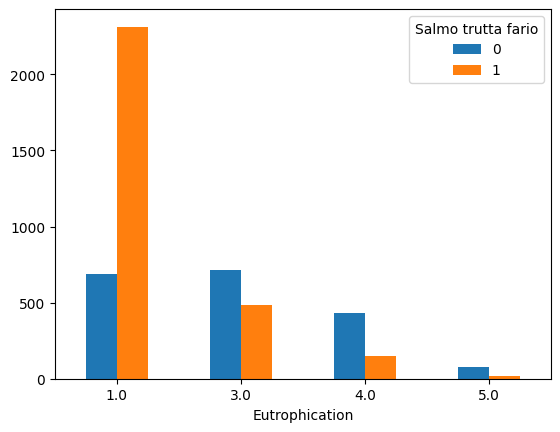

In [6]:

# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

### visualizing `categorical` *versus* `continuous` variables

#### Barplots

`Barplots` are typically used to visualize quantitative variables against categorical variables. This visualization is preferred when there is a limited number of categories and are used when the focus is on comparing quantities. If each category has a correspondent sample of observations, then barplots must show error bars to express data variability.

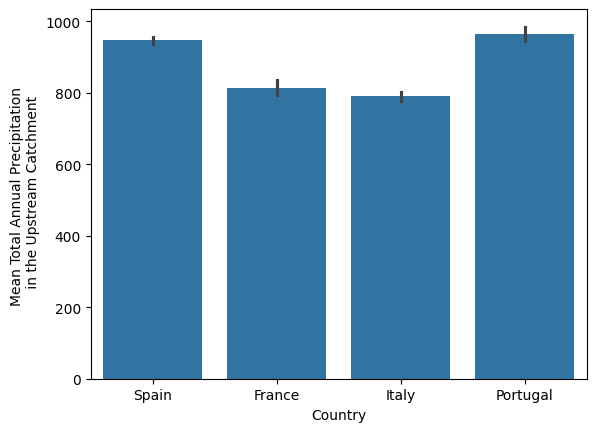

In [7]:
sns.barplot(data=df, x="Country", y="prec_ann_catch")
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

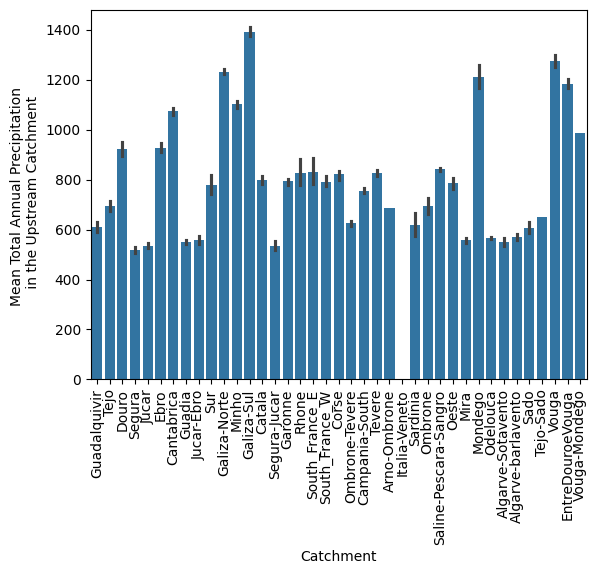

In [8]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch")
plt.xlabel( "Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.xticks(rotation=90)
plt.show()

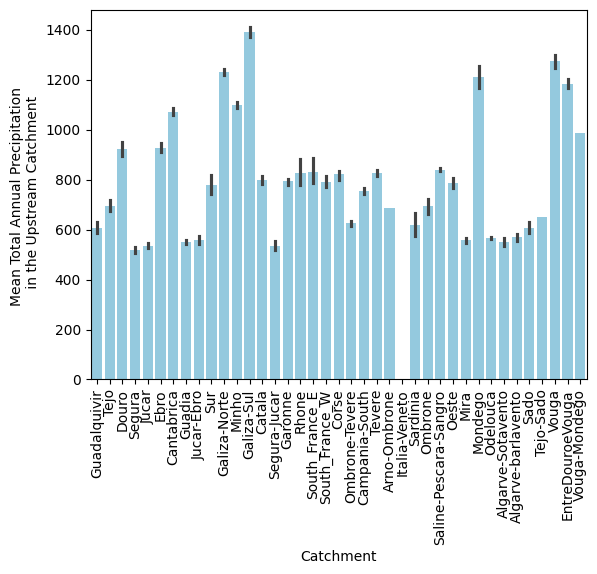

In [9]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", color="skyblue")
plt.xlabel( "Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.xticks(rotation=90)
plt.show()

#### Boxplots

`Boxplots` are also often use to visualize quantitative variables against categorical variables but now the focus is on analysing overlap among samples' distributions.

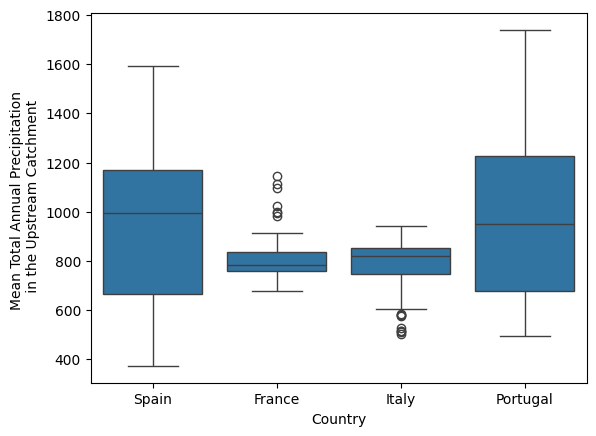

In [10]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df)
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### violin plots

`violin plots` are increasingly used over boxplot to analyse overlap among samples. The probability distribution allows more detail on analysing overlap among samples.  

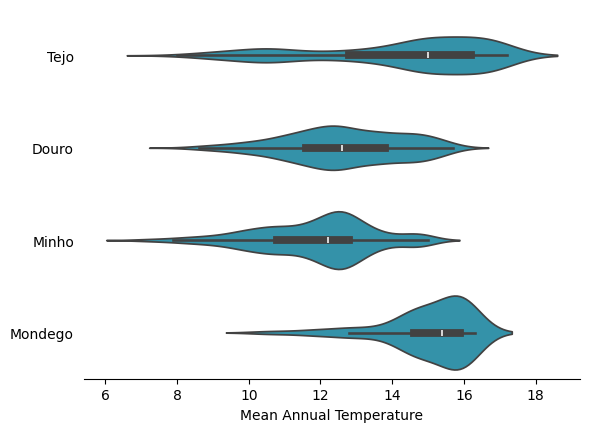

In [11]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.violinplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Stripplots

`Stripplots` are used with the same end as boxplots and violin plots. A `jitter` function is used to randomly display data points along an axis that is perpendicular to the continuous variable axis, which forms a strip of variable width where obervations are plotted. 

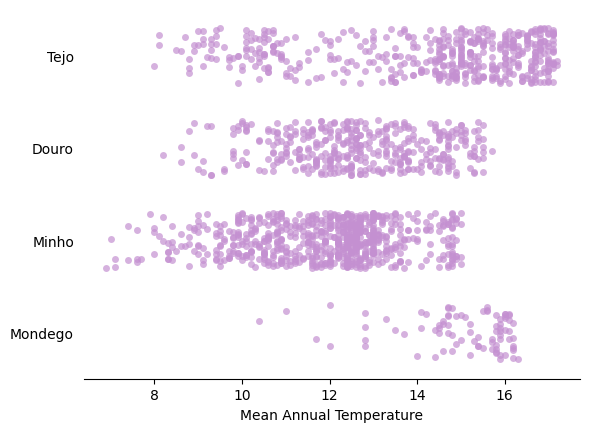

In [12]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.3, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the points
    color='#c490d1', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.7,
    s=5 # point size
    )
plt.tick_params(left=False) # removes bottom tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

#### Mixed visualizations

It is becoming frequent to mix visualizations such as boxplots, violin plots and strip plots in the same plot, offering complementary information about the data.

##### Box plots with jitter

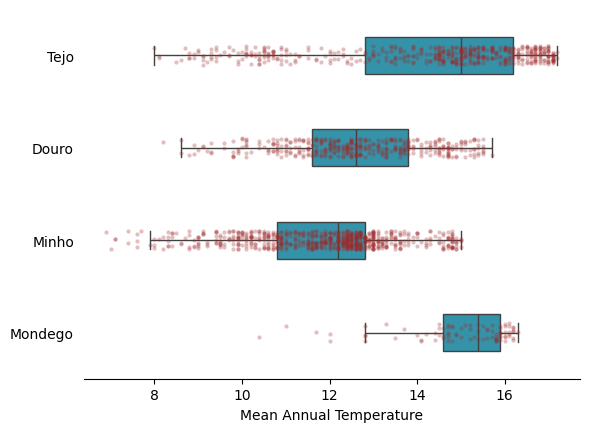

In [13]:

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.boxplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

##### Raincloud plots

In [14]:
import ptitprince as pt

pt.RainCloud(x='Country', y="prec_ann_catch", data=df, 
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.15, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.xlabel( "Mean Total Annual Precipitation in the Upstream Catchment" , size = 10)
plt.ylabel("")
plt.show()

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py)

### visualizing pairs of `continuous` variables

#### Line plot

Line plots are typically used to plot a variable against time.

But it can make some sense in other situations, such as in the following example:

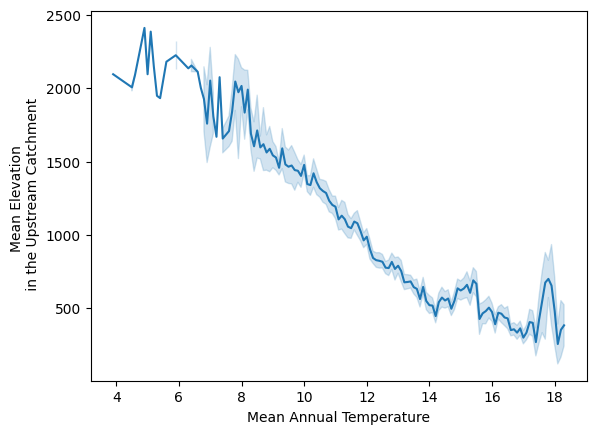

In [15]:
sns.lineplot(data=df, x='temp_ann', y='Elevation_mean_catch')
plt.xlabel( "Mean Annual Temperature" , size = 10) 
plt.ylabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### Scatter plots

`scatter plots` are a useful method of comparing continuous variables against each other. They often are used to map independent and dependent variables on a 2D graph. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

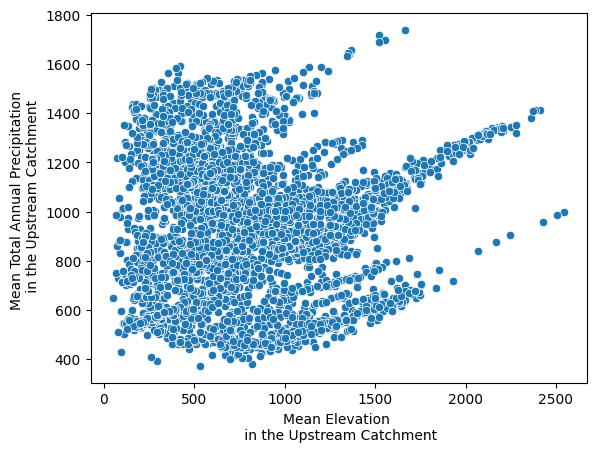

In [16]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
plt.xlabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

#### Joint plots

A Jointplot is a figure that showcases the relationship between two variables, combining scatter plots, hexbin plots, regression plots, or 2D kernel density plots with histograms, KDE (Kernel Density Estimate) plots, or other representations of the univariate distribution of each variable on the margins.

Run codes bellow for some examples using Mean Total Annual Precipitation against Mean Elevation:

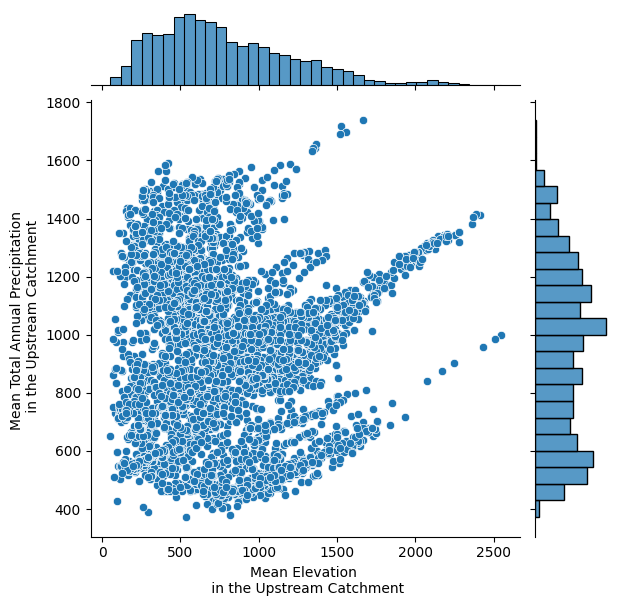

In [17]:
# Scatter plot with histograms

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles in the case of jointplots
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

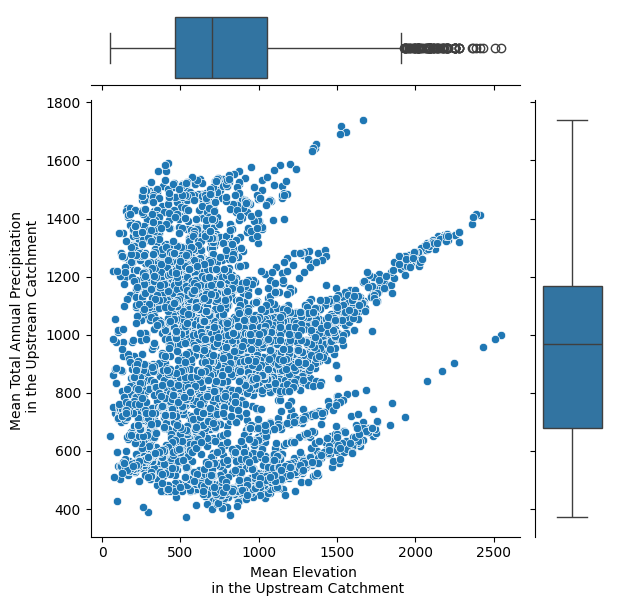

In [18]:
# Scatter plot with boxplots

g = sns.JointGrid(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.scatterplot, sns.boxplot)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

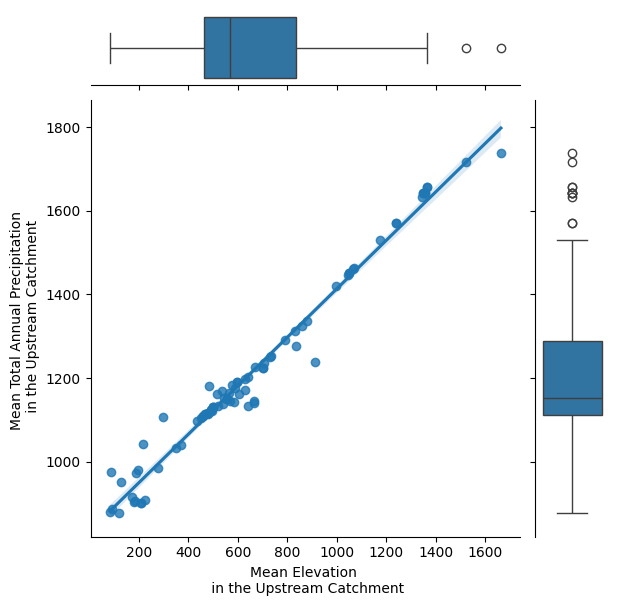

In [19]:
# Scatter plot with regression line and boxplots

g = sns.JointGrid(data=df[df['Catchment_name']=='Mondego'], x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.regplot, sns.boxplot)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

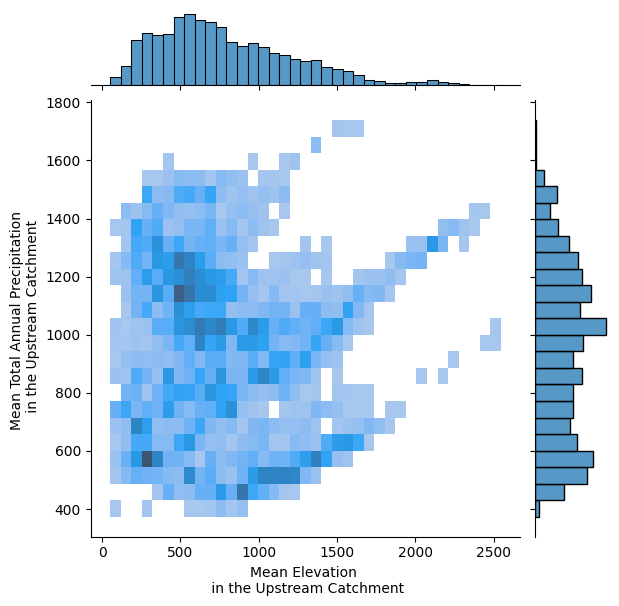

In [20]:
# Heat plot and histograms
g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hist")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

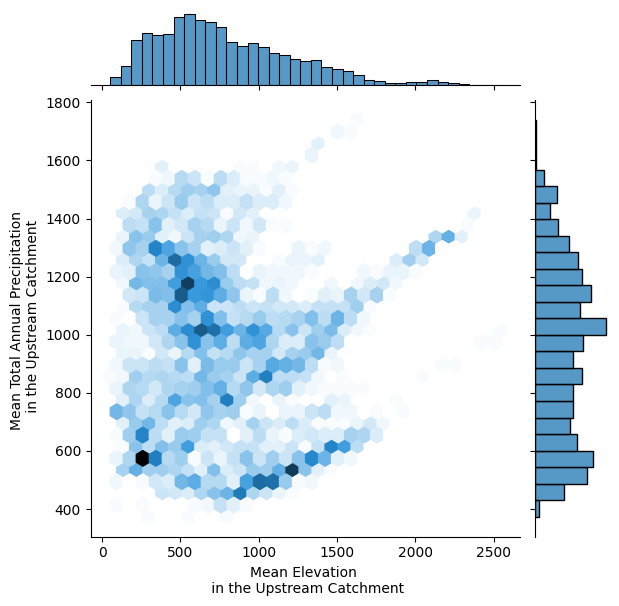

In [21]:
# Hexbin plot with histogram

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hex")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

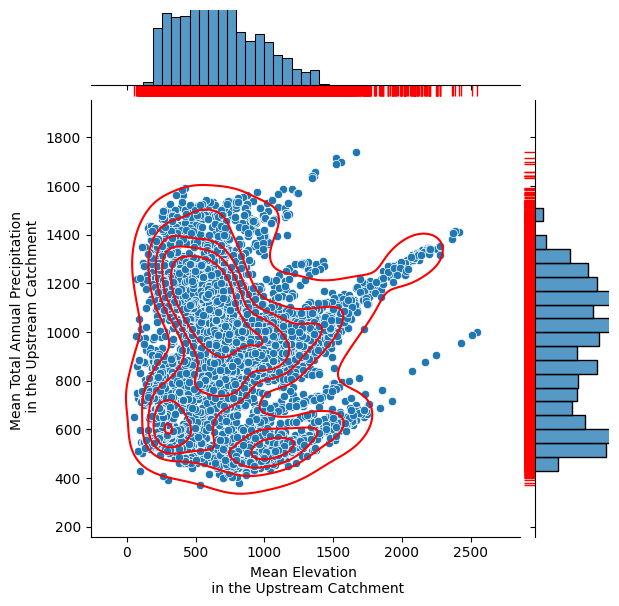

In [22]:
# KDE plots with rugplots and histograms

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

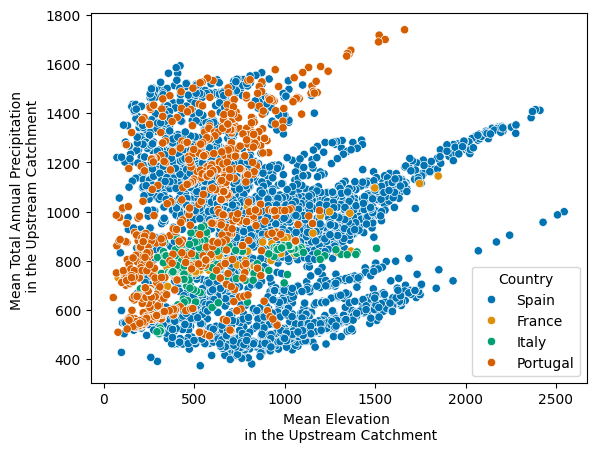

In [23]:
# Scatterplots with categorical variable

sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', palette="colorblind")
plt.xlabel( "Mean Elevation \n in the Upstream Catchment" , size = 10) 
plt.ylabel( "Mean Total Annual Precipitation \n in the Upstream Catchment" , size = 10) 
plt.show()

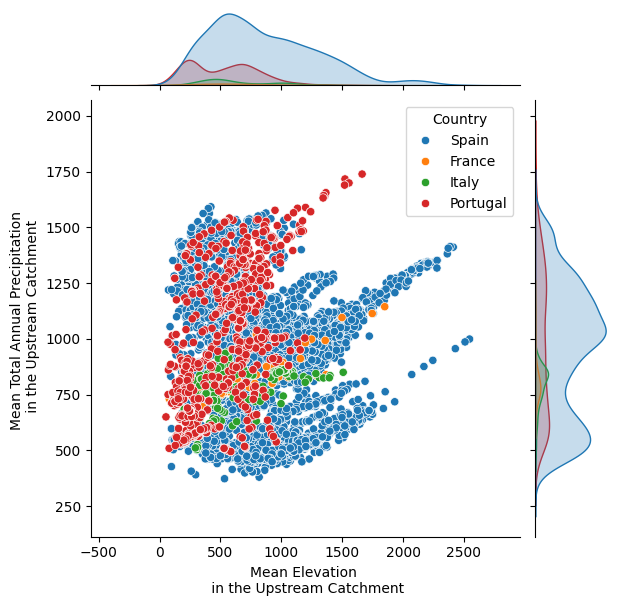

In [24]:
# Scatter plot with categorical variable and univariate KDE plot

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country')
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()

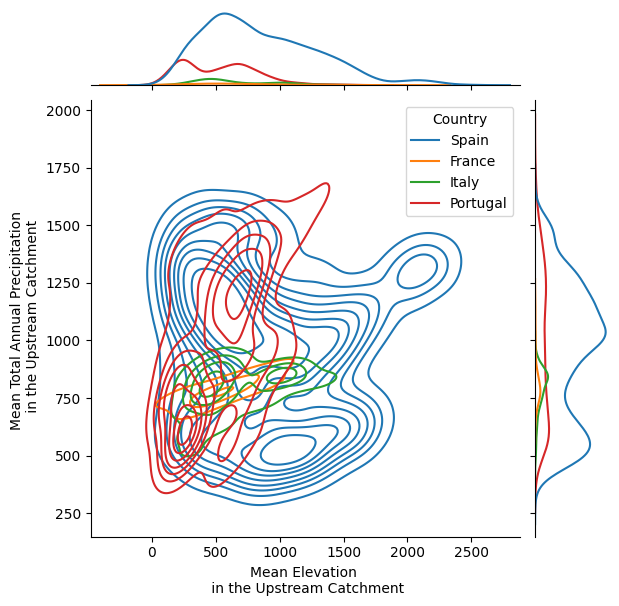

In [25]:
# Bivariate and univariate KDE plots

g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', kind="kde")
g.ax_joint.set_xlabel('Mean Elevation \n in the Upstream Catchment') # NOTE: it's not possible to use plt.xlabel to change axis titles
g.ax_joint.set_ylabel('Mean Total Annual Precipitation \n in the Upstream Catchment')
plt.show()